In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns",None)
sns.set_theme(style="darkgrid",palette=sns.color_palette("Set2"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/train.csv",index_col=[0])
df_test=pd.read_csv("/content/drive/MyDrive/test.csv",index_col=[0])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# DATA SETS Cleannning, Mining

## Cleanning "NA" and Replace


In [ ]:
#Percentage of each missing value
df_missing=df_train.isnull().sum().reset_index()
df_missing.columns=["feature","missing count"]
df_missing["missing percentage"]=df_missing["missing count"]/df_train.shape[0]
df_missing["missing percentage"]=df_missing["missing percentage"].map(lambda x:"{:0.2%}".format(x))

df_nunique=df_train.nunique().reset_index()
df_nunique.columns=["feature","nunique"]

df_stats=pd.merge(df_missing,df_nunique,on=["feature"])
df_stats.sort_values(by="missing count",ascending=False,inplace=True)
df_stats

,feature,missing count,missing percentage,nunique
22,Arrival Delay in Minutes,310,0.30%,455
0,id,0,0.00%,103904
1,Gender,0,0.00%,2
21,Departure Delay in Minutes,0,0.00%,446
20,Cleanliness,0,0.00%,6
19,Inflight service,0,0.00%,6
18,Checkin service,0,0.00%,6
17,Baggage handling,0,0.00%,5
16,Leg room service,0,0.00%,6
15,On-board service,0,0.00%,6


+ after the explore and searching：
1. "Arrival Delay in Minutes": have NA （in the test part also have NA，need to be replace），those can be fixed by median
2. from "Inflight wifi service" to	Cleanliness",  can be define as numerical data sets
3. "Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes" aslo can be define as numerical
4. "Gender" "Customer Type" "Type of Travel" "Class" can be define as Classification，could use one-hot codeing
5.  The Y variable is  satisfaction 

## The varibles' distributing 


In [ ]:
# For the Y data , the satisfaction and neutral or dissatisfied are comparatively balance 
df_train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
df_train['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

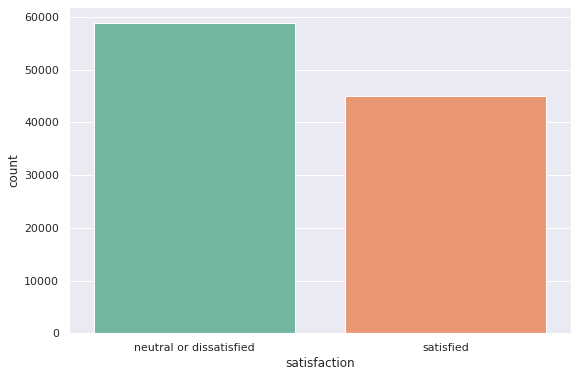

In [ ]:
#target y 

plt.figure(figsize=(9,6))
g = sns.countplot(x="satisfaction", data=df_train)

##  Each Varibles  vs The Satisfaction (Distribution)

In [ ]:
# Classify varibles' Type

cat_features=['Gender', 'Customer Type', 
              'Type of Travel', 'Class']

num_features=['Age', 'Flight Distance', 'Departure Delay in Minutes',
              'Arrival Delay in Minutes', 'Inflight wifi service',
              'Departure/Arrival time convenient', 'Ease of Online booking',
              'Gate location', 'Food and drink', 'Online boarding', 
              'Seat comfort','Inflight entertainment', 'On-board service',
              'Leg room service','Baggage handling', 'Checkin service', 
              'Inflight service','Cleanliness']

Satisfaction Distribution by Gender


satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,0.572629,0.427371
Male,0.560525,0.439475


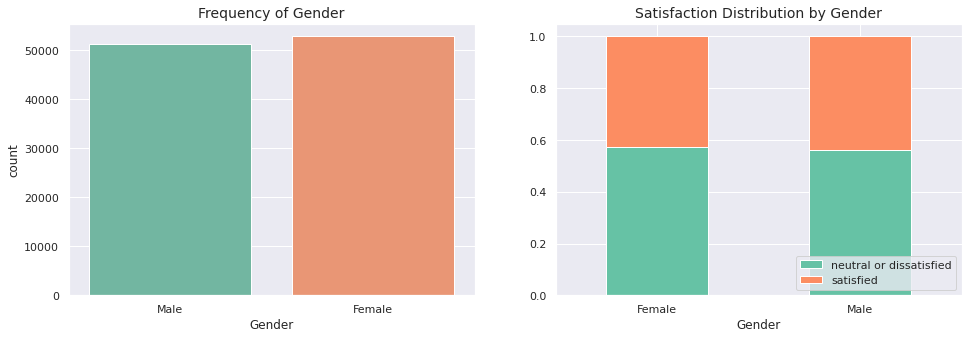

Satisfaction Distribution by Customer Type


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,0.522709,0.477291
disloyal Customer,0.763342,0.236658


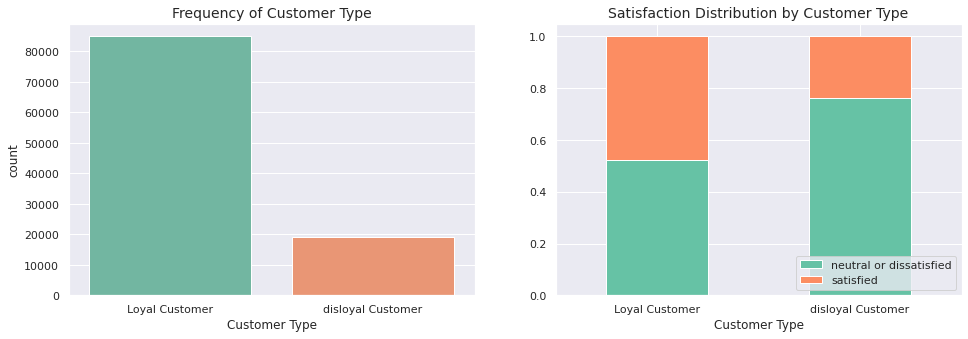

Satisfaction Distribution by Type of Travel


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,0.417403,0.582597
Personal Travel,0.898322,0.101678


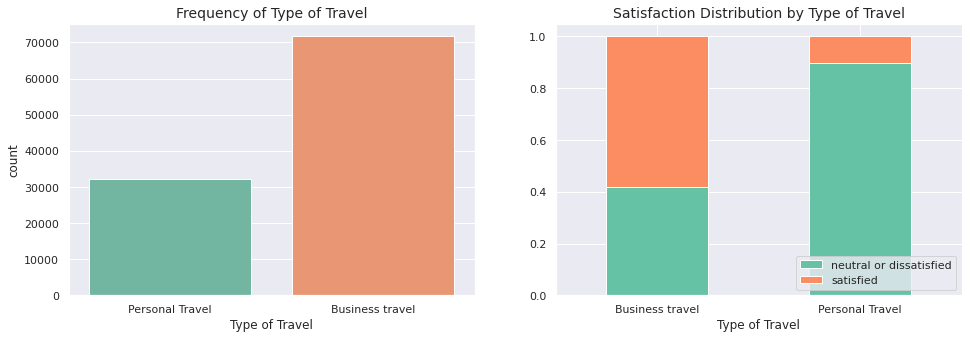

Satisfaction Distribution by Class


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064


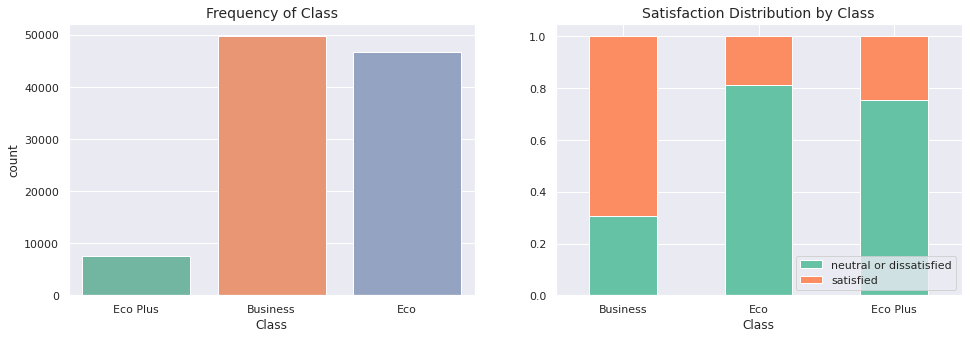

In [ ]:
# At beginnig we need to know those varibles related distribution with Y
# The Left plot is cat_features their own distribution polt
# The right plot is how the Satisfaction or Dissatisfaction distributed in the diferent type
# Such as : From customer type plot , the plot shows  Loyal's cust is much higher than disLoyal 
# the plot could tell us the significant distinction from the different's varibles by Satisfaction count
# such as : gender has less distiction plot ,but Class and Customer Type plots give us lots of usful information
for col in cat_features:
    fig,axs=plt.subplots(1,2,figsize=(16,5))
    
    sns.countplot(x=col,data=df_train,ax=axs[0])
    axs[0].set_title("Frequency of {}".format(col),fontsize=14)
    axs[0]
    
    tmp_stats=df_train.pivot_table(columns=["satisfaction"],index=[col],values="id",aggfunc="count")
    tmp_stats.sum(axis=1)
    tmp_stats=tmp_stats.div(tmp_stats.sum(axis=1),axis=0) 
    print("Satisfaction Distribution by {}".format(col))
    display(tmp_stats)
    
    tmp_stats.plot.bar(stacked=True,ax=axs[1],rot=0)
    axs[1].set_title("Satisfaction Distribution by {}".format(col),fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

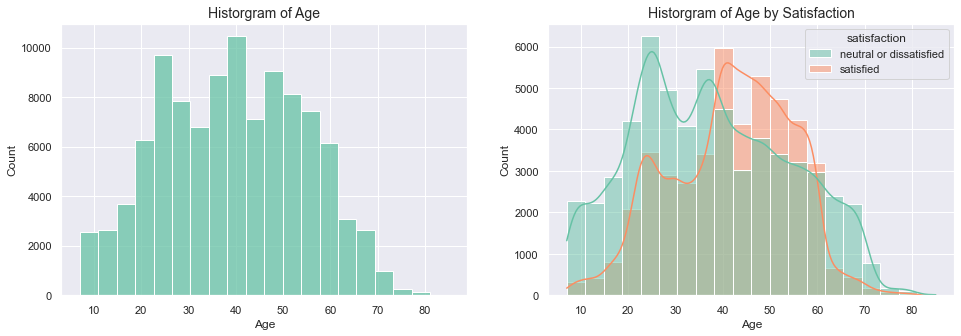

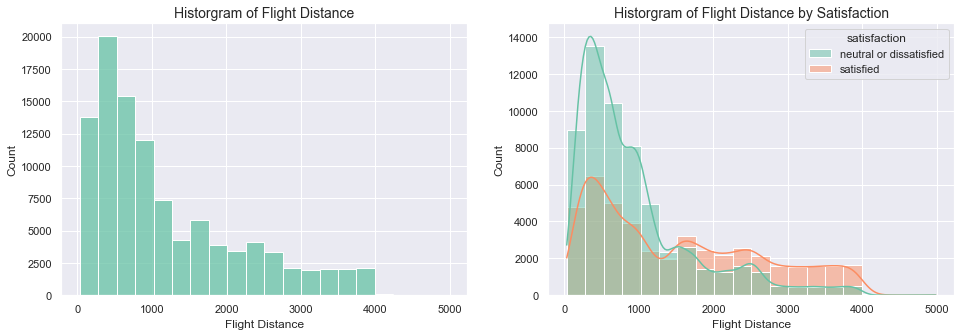

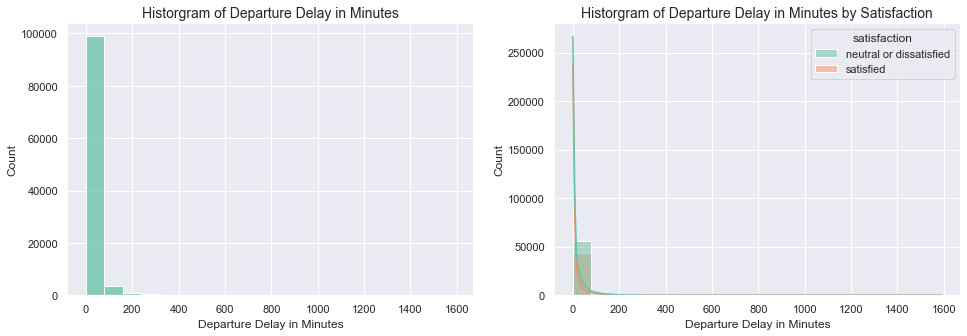

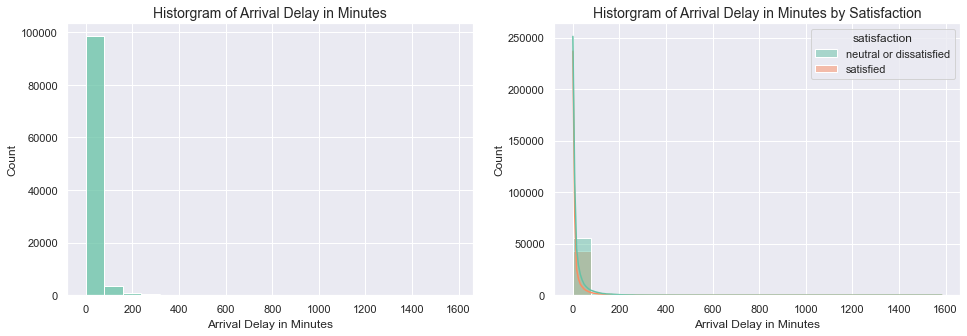

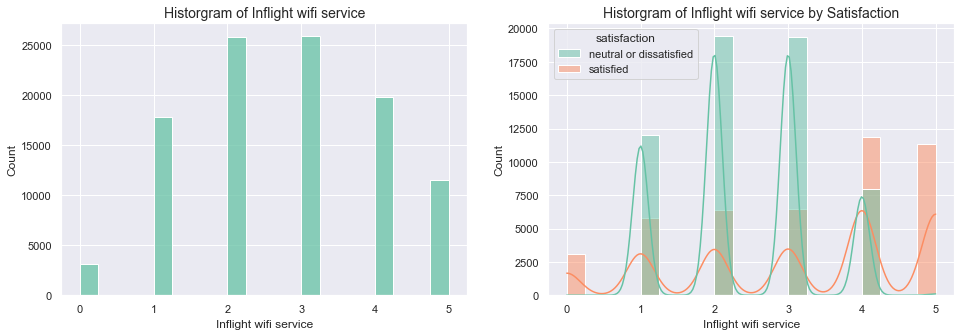

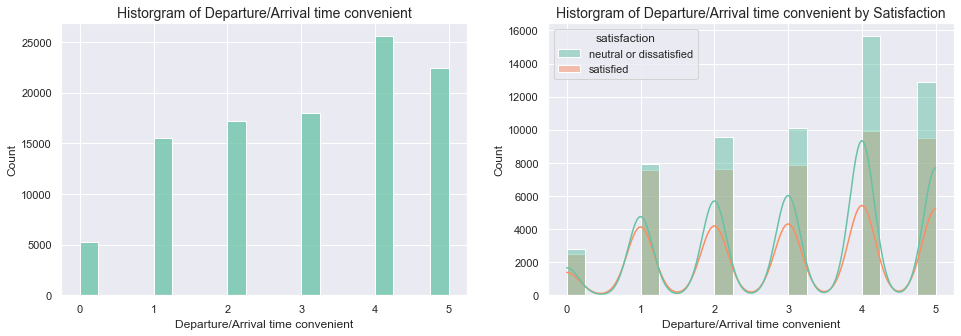

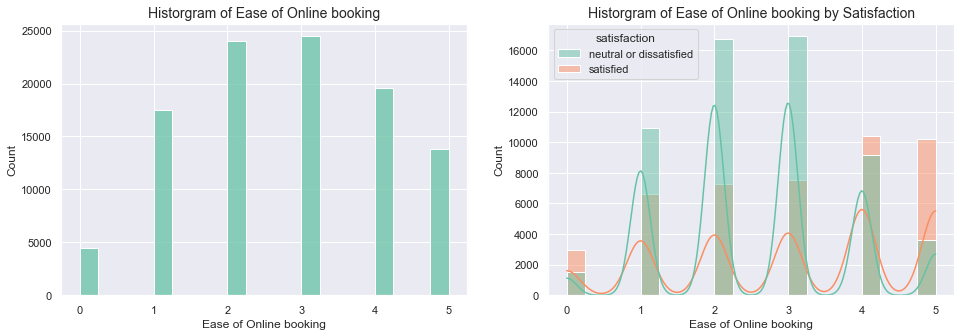

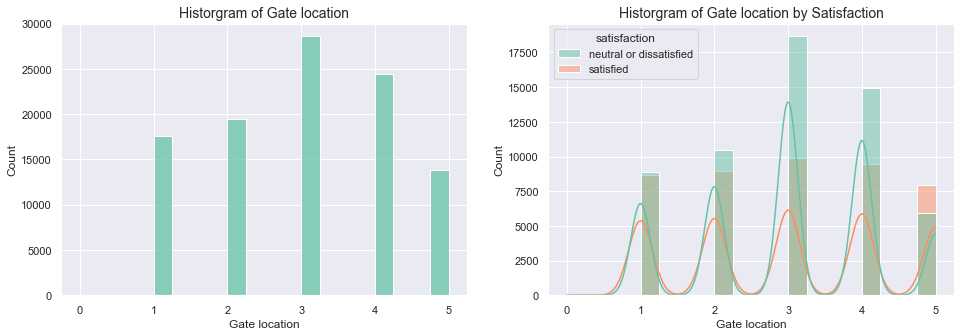

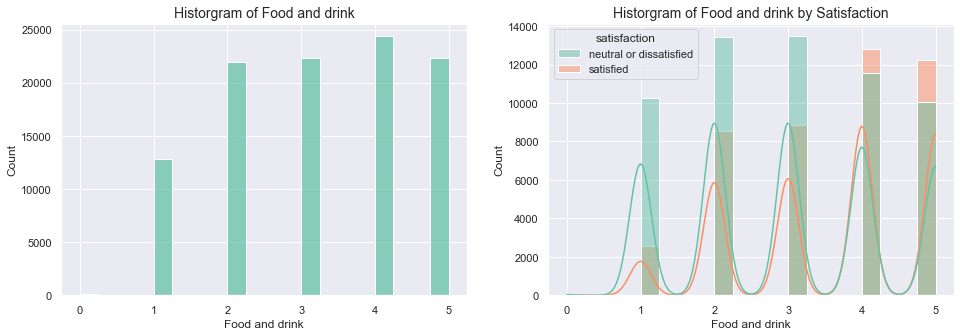

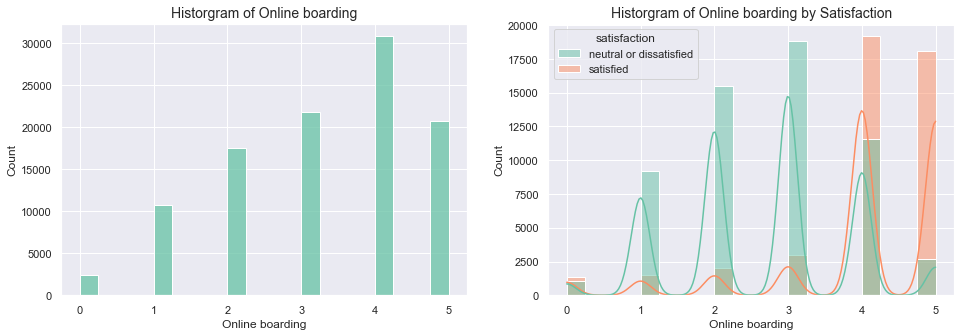

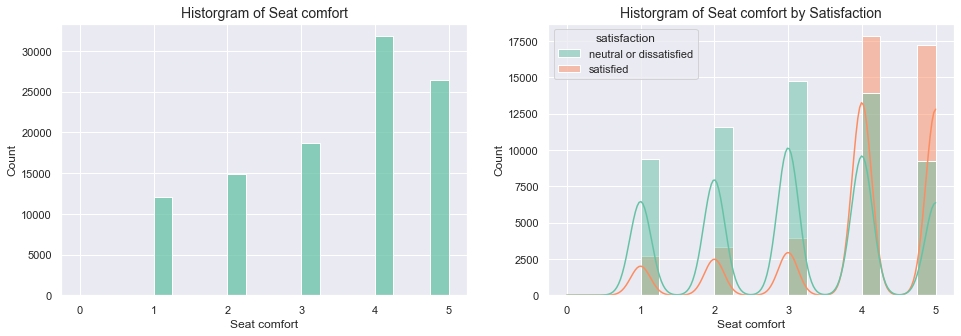

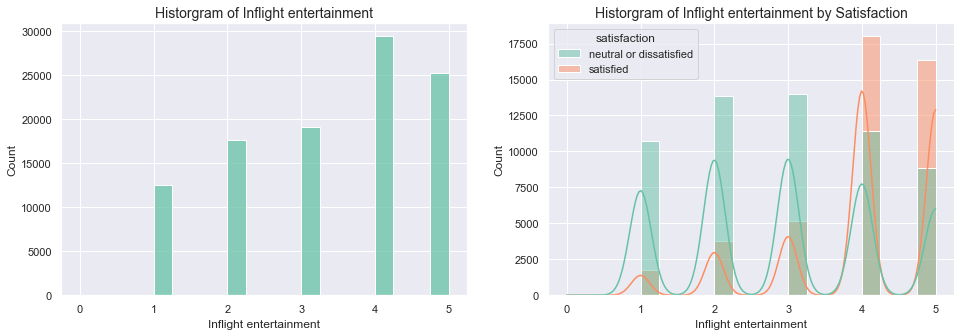

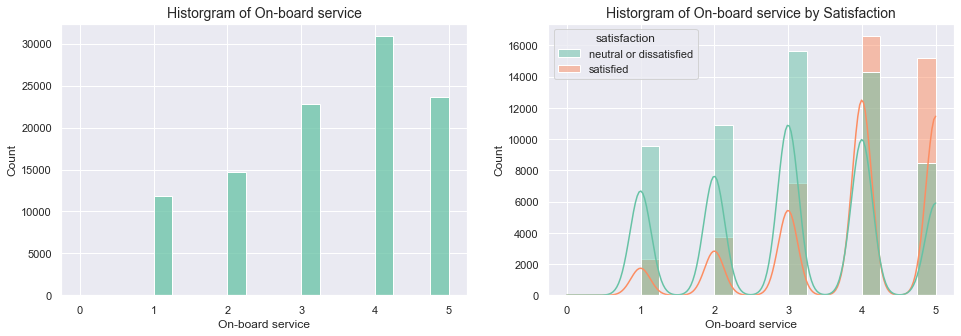

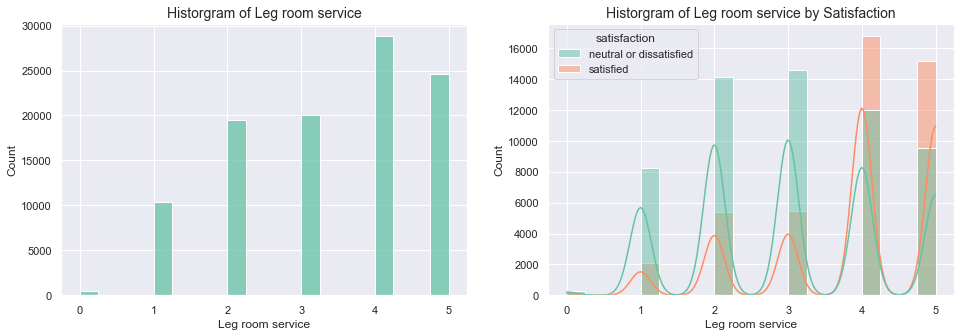

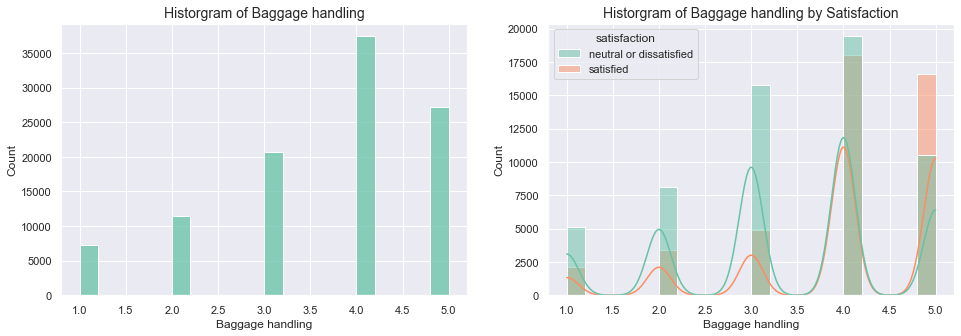

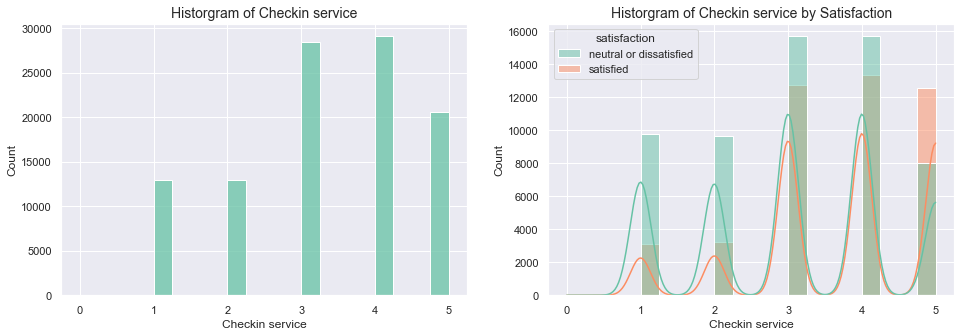

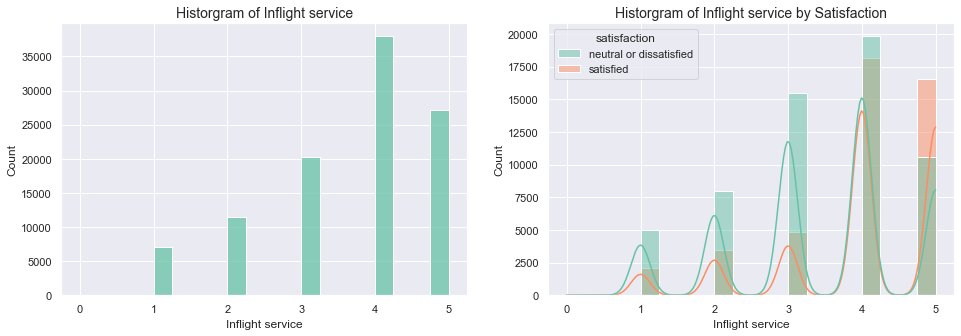

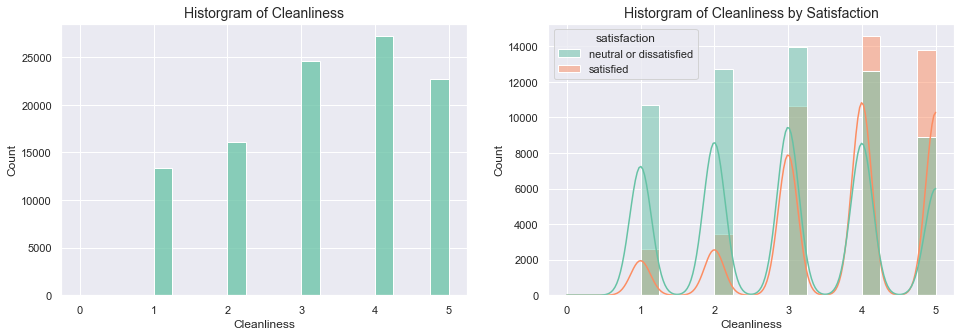

In [ ]:
# For the num_features we also need to analyze their each indiviuals' distrubution with satisfaction(Y)
# First we need to identify their outliers or fix their distribution 
#  From the plot we know :'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes' needed to be log(their distributions have left leg)
#  when we use num_feature to build model, the num_feature varible should be standardized 

for col in num_features:
    fig,axs=plt.subplots(1,2,figsize=(16,5))
    
    sns.histplot(x=col,bins=20,data=df_train,ax=axs[0])
    axs[0].set_title("Historgram of {}".format(col),fontsize=14)
    
    sns.histplot(x=col,bins=20,hue="satisfaction",kde=True,data=df_train,ax=axs[1])
    axs[1].set_title("Historgram of {} by Satisfaction".format(col),fontsize=14)
    
#     plt.legend(loc="lower right")
    plt.show()

## Fixing the Date

+  Standardizing each varibles in train set
+  using the same function to fix testing data as well

### Replacing NA


In [ ]:
#For train "Arrival Delay in Minutes"

df_train["Arrival Delay in Minutes"]=df_train["Arrival Delay in Minutes"].fillna(df_train["Arrival Delay in Minutes"].median())

In [ ]:
#For test Arrival Delay in Minutes

df_test["Arrival Delay in Minutes"]=df_test["Arrival Delay in Minutes"].fillna(0)

### Fixing num_features

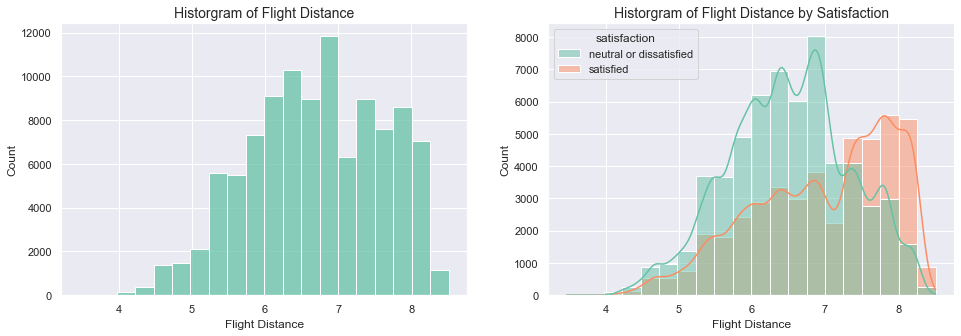

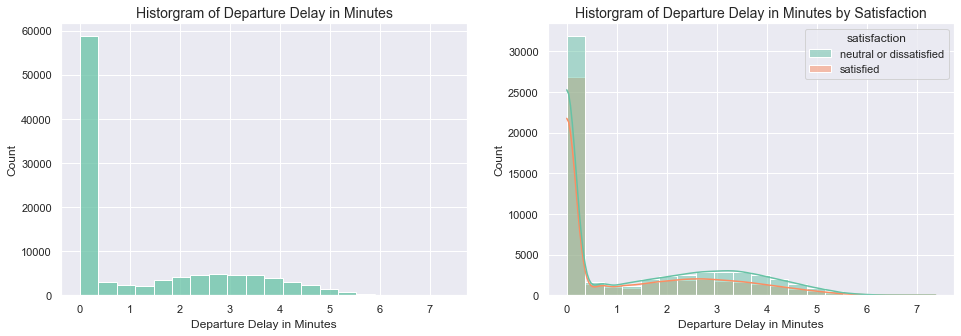

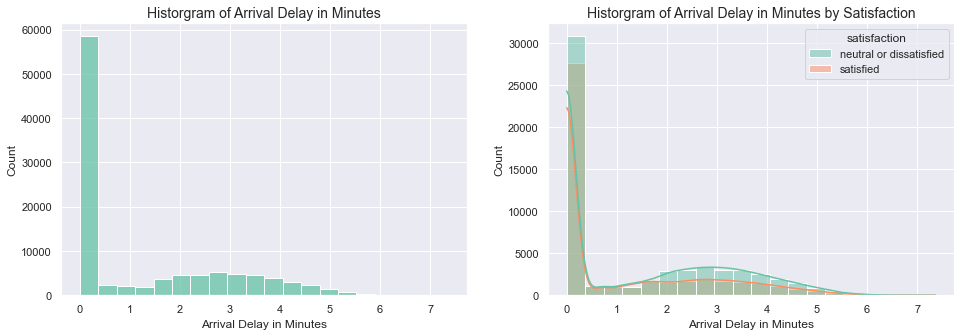

In [ ]:
# Logging the 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes'

for col in ['Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']:
    df_train[col]=np.log1p(df_train[col])
    
# checking the ("Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes') after logging
for col in ['Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']:
    fig,axs=plt.subplots(1,2,figsize=(16,5))
    
    sns.histplot(x=col,bins=20,data=df_train,ax=axs[0])
    axs[0].set_title("Historgram of {}".format(col),fontsize=14)
    
    sns.histplot(x=col,bins=20,hue="satisfaction",kde=True,data=df_train,ax=axs[1])
    axs[1].set_title("Historgram of {} by Satisfaction".format(col),fontsize=14)
    
#     plt.legend(loc="lower right")
    plt.show()

In [ ]:
# use log1p fix test

for col in ['Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']:
    df_test[col]=np.log1p(df_test[col])

### onehot Coding

In [ ]:
# one-hot coding

from sklearn.preprocessing import OneHotEncoder

df_train_cat=df_train[cat_features].copy()
ohe=OneHotEncoder()
ohe.fit(df_train_cat)

cat_oht_names=[]
for xx in ohe.categories_:
    cat_oht_names.extend(list(xx))
    
df_train_cat_ohe=pd.DataFrame(ohe.transform(df_train_cat).toarray(),columns=cat_oht_names)
display(df_train_cat_ohe.head())

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# For the test data

df_test_cat=df_test[cat_features].copy()
df_test_cat_ohe=pd.DataFrame(ohe.transform(df_test_cat).toarray(),columns=cat_oht_names)
display(df_test_cat_ohe.head())

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Using scaler to train accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler

df_train_num=df_train[num_features].copy()
scaler=StandardScaler()
scaler.fit(df_train_num)

df_train_num_scaler=pd.DataFrame(scaler.transform(df_train_num),columns=df_train_num.columns)
df_train_num_scaler.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-1.745279,-0.624953,1.247920,1.032611,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870
1,-0.951360,-1.356251,-0.335060,0.420096,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292
2,-0.885200,0.366777,-0.762842,-0.773559,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870
3,-0.951360,-0.406643,0.770740,0.638887,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251
4,1.430397,-1.458037,-0.762842,-0.773559,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211


In [ ]:
#  use scaler to train test

df_test_num=df_test[num_features].copy()
df_test_num_scaler=pd.DataFrame(scaler.transform(df_test_num),columns=df_train_num.columns)
df_test_num_scaler.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.834958,-1.773937,1.663718,1.561514,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870
1,-0.223601,1.370029,-0.762842,-0.773559,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870
2,-1.282160,-1.575937,-0.762842,-0.773559,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251
3,0.305678,1.550312,-0.762842,0.420096,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829
4,0.636478,0.404346,-0.762842,1.094004,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829


### Y codeing


In [ ]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
y_train=la.fit_transform(df_train['satisfaction'])
y_test=la.transform(df_test['satisfaction'])

## combine train_X (df_train_cat_ohe , num_features_scaler, Y[satisfaction])



In [ ]:
df_train_model=pd.concat([df_train_cat_ohe,df_train_num_scaler],axis=1)
df_train_model["target"]=df_train['satisfaction'].values
df_train_model.head()

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,target
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.745279,-0.624953,1.247920,1.032611,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,neutral or dissatisfied
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.951360,-1.356251,-0.335060,0.420096,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,neutral or dissatisfied
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.885200,0.366777,-0.762842,-0.773559,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,satisfied
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.951360,-0.406643,0.770740,0.638887,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,neutral or dissatisfied
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.430397,-1.458037,-0.762842,-0.773559,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,satisfied


In [ ]:
df_test_model=pd.concat([df_test_cat_ohe,df_test_num_scaler],axis=1)
df_test_model["target"]=df_test['satisfaction'].values
df_test_model.head()

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,target
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.834958,-1.773937,1.663718,1.561514,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870,satisfied
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.223601,1.370029,-0.762842,-0.773559,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870,satisfied
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.282160,-1.575937,-0.762842,-0.773559,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251,neutral or dissatisfied
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.305678,1.550312,-0.762842,0.420096,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829,satisfied
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.636478,0.404346,-0.762842,1.094004,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829,satisfied


# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

##  Prepare X,Y

In [ ]:
#  prepare x y
x = df_train_model.drop(["target"],axis=1)
y = pd.get_dummies(df_train_model["target"])

#  Final split for [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=1)

## building the model

In [ ]:

# deep learnning nerve net work train the model
model = Sequential()
model.add(Dense(128, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(64, activation='relu')) # Hidden 2
model.add(Dense(32, activation='relu')) # Hidden 3
model.add(Dense(y.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', metrics =['accuracy'],optimizer='adam')

# When the accuracy stop increasing, then we  stop the model traning
monitor = EarlyStopping(monitor='val_accuracy', min_delta=1e-3, patience=5,verbose=1, mode='auto', restore_best_weights=True)
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
2436/2436 - 4s - loss: 0.1704 - accuracy: 0.9291 - val_loss: 0.1243 - val_accuracy: 0.9490
Epoch 2/100
2436/2436 - 2s - loss: 0.1148 - accuracy: 0.9509 - val_loss: 0.1041 - val_accuracy: 0.9577
Epoch 3/100
2436/2436 - 2s - loss: 0.0999 - accuracy: 0.9574 - val_loss: 0.1012 - val_accuracy: 0.9573
Epoch 4/100
2436/2436 - 2s - loss: 0.0926 - accuracy: 0.9596 - val_loss: 0.1010 - val_accuracy: 0.9568
Epoch 5/100
2436/2436 - 2s - loss: 0.0878 - accuracy: 0.9620 - val_loss: 0.0951 - val_accuracy: 0.9599
Epoch 6/100
2436/2436 - 2s - loss: 0.0854 - accuracy: 0.9627 - val_loss: 0.0927 - val_accuracy: 0.9604
Epoch 7/100
2436/2436 - 2s - loss: 0.0824 - accuracy: 0.9637 - val_loss: 0.0939 - val_accuracy: 0.9598
Epoch 8/100
2436/2436 - 2s - loss: 0.0805 - accuracy: 0.9646 - val_loss: 0.0914 - val_accuracy: 0.9604
Epoch 9/100
2436/2436 - 2s - loss: 0.0789 - accuracy: 0.9651 - val_loss: 0.0956 - val_accuracy: 0.9611
Epoch 10/100
2436/2436 - 2s - loss: 0.0771 - accuracy: 0.9659 - val_loss:

## Train history

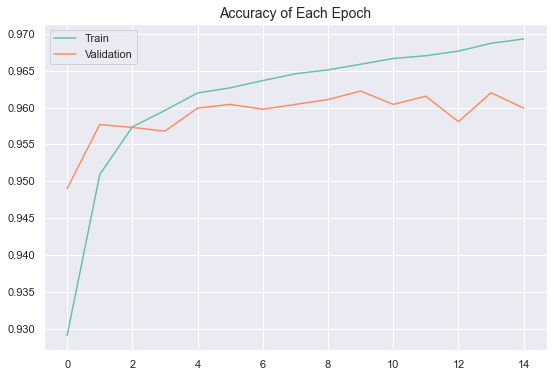

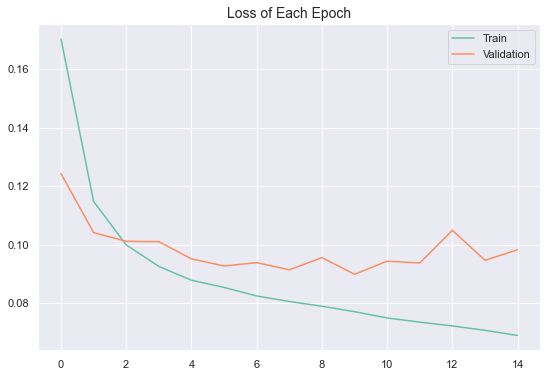

In [ ]:
df_hist=pd.DataFrame(history.history)

# the plot for  accuracy
plt.figure(figsize=(9,6))
plt.plot(df_hist["accuracy"],label="Train")
plt.plot(df_hist["val_accuracy"],label="Validation")
plt.legend()
plt.title("Accuracy of Each Epoch",fontsize=14)
plt.show()

# the plot for  loss 
plt.figure(figsize=(9,6))
plt.plot(df_hist["loss"],label="Train")
plt.plot(df_hist["val_loss"],label="Validation")
plt.legend()
plt.title("Loss of Each Epoch",fontsize=14)
plt.show()

## model saving

In [ ]:
#  save the model

model.save("./network.h5")

# Using model to test the [test data sets]

## loading the model


In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model("network.h5")

## For Predcition


In [ ]:
xtest_new=df_test_model.drop(["target"],axis=1)

# 预测
df_test_model["prediction"]=np.argmax(model2.predict(xtest_new),axis=1)
df_test_model["prediction"]=df_test_model["prediction"].map({0:"neutral or dissatisfied",1:"satisfied"})
df_test_model.head()

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,target,prediction
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.834958,-1.773937,1.663718,1.561514,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870,satisfied,satisfied
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.223601,1.370029,-0.762842,-0.773559,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870,satisfied,satisfied
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.282160,-1.575937,-0.762842,-0.773559,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251,neutral or dissatisfied,neutral or dissatisfied
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.305678,1.550312,-0.762842,0.420096,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829,satisfied,satisfied
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.636478,0.404346,-0.762842,1.094004,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829,satisfied,neutral or dissatisfied


## The Testing Report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(df_test_model["target"],df_test_model["prediction"]))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



##  THe TPR, FPR Matrix

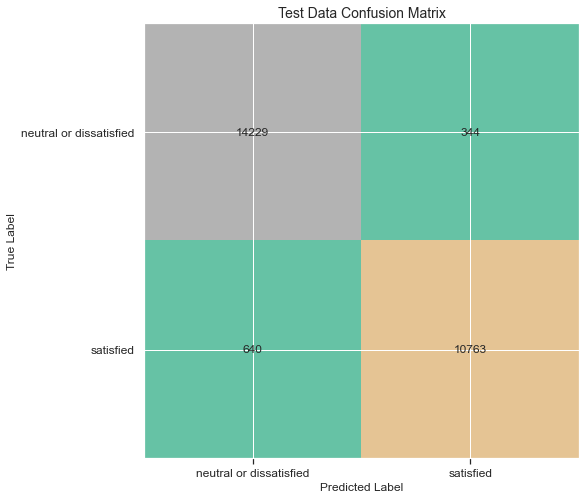

In [ ]:
confmat_data=confusion_matrix(df_test_model["target"],df_test_model["prediction"])

plt.figure(figsize=(8,8))
ax = plt.gca()
plt.matshow(confmat_data, cmap=plt.cm.Set2, fignum=0)
for i in range(confmat_data.shape[0]):
    for j in range(confmat_data.shape[1]):
        plt.text(x=j, y=i,s=confmat_data[i, j],va='center', ha='center')

plt.xticks([0,1],["neutral or dissatisfied","satisfied"],fontsize=12)
ax.xaxis.set_ticks_position("bottom")
plt.xlabel("Predicted Label",fontsize=12)

plt.yticks([0,1],["neutral or dissatisfied","satisfied"],fontsize=12)
plt.title("Test Data Confusion Matrix",fontsize=14)
plt.ylabel("True Label",fontsize=12)

plt.show()